<a href="https://colab.research.google.com/github/TOOBANOOR123/DataScience_BootCamp/blob/main/House_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**House price prediction** is a problem in the real estate industry to make informed decisions. By using machine learning algorithms we can predict the price of a house based on various features such as location, size, number of bedrooms and other relevant factors.

To tackle this issue we will build a machine learning model trained on the House Price Prediction Dataset. We can download the dataset from the provided link. It includes 13 features:

### Step1: Importing libraries and dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('HousePricePrediction.xlsx')
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


Data Visualization

In [ ]:
num_data = df.select_dtypes(include=['number'])
num_data.head()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,8450,5,2003,2003,0.0,856.0,208500.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0
2,60,11250,5,2001,2002,0.0,920.0,223500.0
3,70,9550,5,1915,1970,0.0,756.0,140000.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0


<Axes: >

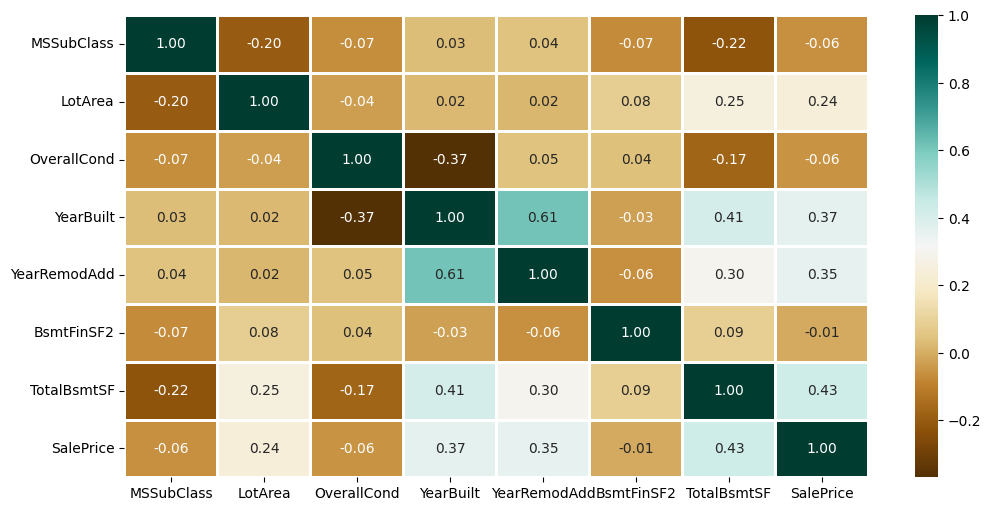

In [ ]:
plt.figure(figsize=(12, 6))

sns.heatmap(num_data.corr(),
            cmap='BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [ ]:
df.aggregate('count')

,0
Id,2919
MSSubClass,2919
MSZoning,2915
LotArea,2919
LotConfig,2919
BldgType,2919
OverallCond,2919
YearBuilt,2919
YearRemodAdd,2919
Exterior1st,2918


In [ ]:
df.isna().value_counts()

Id     MSSubClass  MSZoning  LotArea  LotConfig  BldgType  OverallCond  YearBuilt  YearRemodAdd  Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice
False  False       False     False    False      False     False        False      False         False        False       False        False        1460
                                                                                                                                       True         1453
                   True      False    False      False     False        False      False         False        False       False        True            4
                   False     False    False      False     False        False      False         False        True        True         True            1
                                                                                                 True         False       False        True            1
Name: count, dtype: int64

In [ ]:
df.isna().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,1


In [ ]:
df.MSZoning.mode()

,MSZoning
0,RL


In [ ]:
df.isna().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,1


In [ ]:
df.drop(['Id'], axis=1, inplace=True)

Replacing null values in the **SalePrice** column with the mean of the **SalePrice** to make the column distribution symmetrical

In [ ]:
df['SalePrice'] = df['SalePrice'].fillna(df['SalePrice'].mean())

In [ ]:
df.isna().sum()

,0
MSSubClass,0
MSZoning,4
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,1
BsmtFinSF2,1


Dropping remaining null values

In [ ]:
df1 = df.dropna()

Checking for sure if there is still any null value in the dataframe

In [ ]:
df1.isna().sum()

,0
MSSubClass,0
MSZoning,0
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,0
BsmtFinSF2,0


Applying One-Hot Encoding to converting label categorical variables

In [ ]:
from sklearn.preprocessing import OneHotEncoder
s = (df1.dtypes == 'object')
obj_cols = list(s[s].index)
print("Categorical Variables: ", obj_cols)
print("No of Categorical Variables: ", len(obj_cols))

Categorical Variables:  ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No of Categorical Variables:  4


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

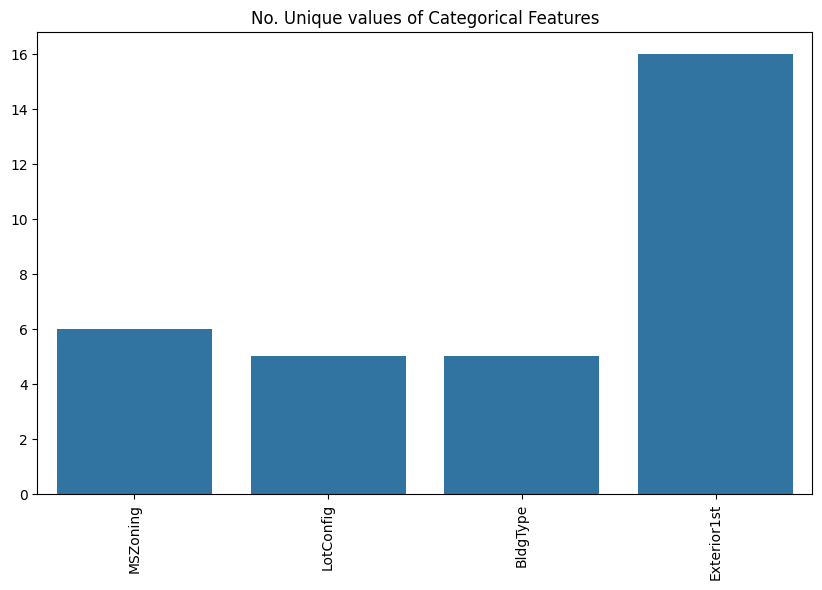

In [ ]:
unique_values = []
for col in obj_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=obj_cols, y=unique_values)

<Axes: xlabel='MSZoning'>

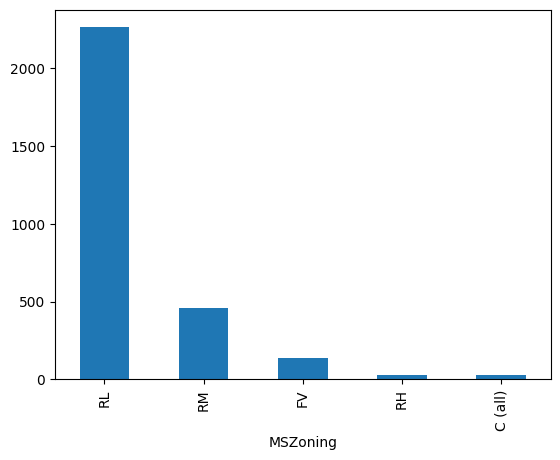

In [ ]:
##Vidualizing the barplot
df1.MSZoning.value_counts().plot(kind='bar')

<Axes: xlabel='LotConfig'>

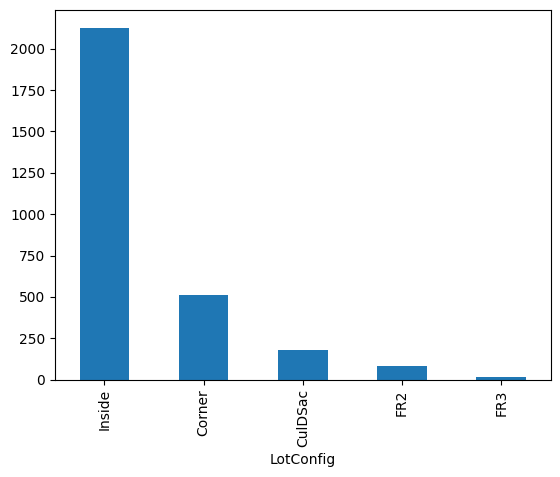

In [ ]:
df1.LotConfig.value_counts().plot(kind='bar')

<Axes: xlabel='BldgType'>

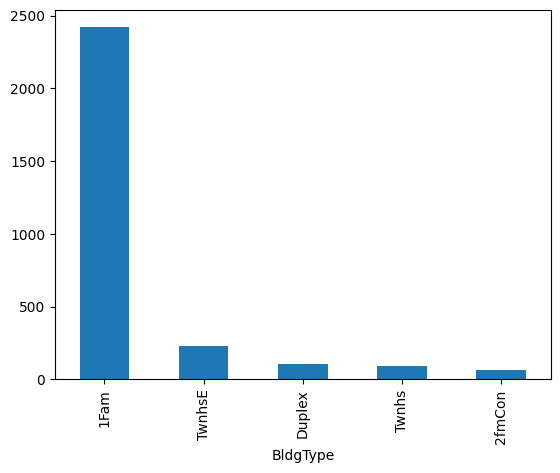

In [ ]:
df1.BldgType.value_counts().plot(kind='bar')

In [ ]:
df2 = pd.get_dummies(df1.MSZoning, drop_first = True).astype('int')
df2

,FV,RH,RL,RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
2914,0,0,0,1
2915,0,0,0,1
2916,0,0,1,0
2917,0,0,1,0


In [ ]:
df3 = pd.concat([df.drop('MSZoning', axis=1), df2], axis=1)
df3

,MSSubClass,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice,FV,RH,RL,RM
0,60,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.00000,0.0,0.0,1.0,0.0
1,20,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.00000,0.0,0.0,1.0,0.0
2,60,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.00000,0.0,0.0,1.0,0.0
3,70,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.00000,0.0,0.0,1.0,0.0
4,60,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.00000,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,180921.19589,0.0,0.0,0.0,1.0
2915,160,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,180921.19589,0.0,0.0,0.0,1.0
2916,20,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,180921.19589,0.0,0.0,1.0,0.0
2917,85,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,180921.19589,0.0,0.0,1.0,0.0


In [ ]:
df.LotConfig.nunique()

5

In [ ]:
encoded_lot = pd.get_dummies(df3.LotConfig).astype('int')
encoded_lot

,Corner,CulDSac,FR2,FR3,Inside
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,0,0,1
3,1,0,0,0,0
4,0,0,1,0,0
...,...,...,...,...,...
2914,0,0,0,0,1
2915,0,0,0,0,1
2916,0,0,0,0,1
2917,0,0,0,0,1


In [ ]:
df3 = pd.concat([df3.drop('LotConfig', axis=1), encoded_lot], axis=1)
df3

,MSSubClass,LotArea,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice,FV,RH,RL,RM,Corner,CulDSac,FR2,FR3,Inside
0,60,8450,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.00000,0.0,0.0,1.0,0.0,0,0,0,0,1
1,20,9600,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.00000,0.0,0.0,1.0,0.0,0,0,1,0,0
2,60,11250,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.00000,0.0,0.0,1.0,0.0,0,0,0,0,1
3,70,9550,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.00000,0.0,0.0,1.0,0.0,1,0,0,0,0
4,60,14260,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.00000,0.0,0.0,1.0,0.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,Twnhs,7,1970,1970,CemntBd,0.0,546.0,180921.19589,0.0,0.0,0.0,1.0,0,0,0,0,1
2915,160,1894,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,180921.19589,0.0,0.0,0.0,1.0,0,0,0,0,1
2916,20,20000,1Fam,7,1960,1996,VinylSd,0.0,1224.0,180921.19589,0.0,0.0,1.0,0.0,0,0,0,0,1
2917,85,10441,1Fam,5,1992,1992,HdBoard,0.0,912.0,180921.19589,0.0,0.0,1.0,0.0,0,0,0,0,1


In [ ]:
df.BldgType.nunique()

5

In [ ]:
encode_Bldg = pd.get_dummies(df3.BldgType).astype('int')
encode_Bldg

,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
2914,0,0,0,1,0
2915,0,0,0,0,1
2916,1,0,0,0,0
2917,1,0,0,0,0


In [ ]:
df3 = pd.concat([df3.drop('BldgType', axis=1), encode_Bldg], axis=1)
df3

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice,FV,...,Corner,CulDSac,FR2,FR3,Inside,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
0,60,8450,5,2003,2003,VinylSd,0.0,856.0,208500.00000,0.0,...,0,0,0,0,1,1,0,0,0,0
1,20,9600,8,1976,1976,MetalSd,0.0,1262.0,181500.00000,0.0,...,0,0,1,0,0,1,0,0,0,0
2,60,11250,5,2001,2002,VinylSd,0.0,920.0,223500.00000,0.0,...,0,0,0,0,1,1,0,0,0,0
3,70,9550,5,1915,1970,Wd Sdng,0.0,756.0,140000.00000,0.0,...,1,0,0,0,0,1,0,0,0,0
4,60,14260,5,2000,2000,VinylSd,0.0,1145.0,250000.00000,0.0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,CemntBd,0.0,546.0,180921.19589,0.0,...,0,0,0,0,1,0,0,0,1,0
2915,160,1894,5,1970,1970,CemntBd,0.0,546.0,180921.19589,0.0,...,0,0,0,0,1,0,0,0,0,1
2916,20,20000,7,1960,1996,VinylSd,0.0,1224.0,180921.19589,0.0,...,0,0,0,0,1,1,0,0,0,0
2917,85,10441,5,1992,1992,HdBoard,0.0,912.0,180921.19589,0.0,...,0,0,0,0,1,1,0,0,0,0


In [ ]:
df.Exterior1st.value_counts()

,count
Exterior1st,
VinylSd,1025
MetalSd,450
HdBoard,442
Wd Sdng,411
Plywood,221
CemntBd,126
BrkFace,87
WdShing,56
AsbShng,44


In [ ]:
# Define threshold for rare categories
threshold = 50

# Find categories below the threshold
value_counts = df['Exterior1st'].value_counts()
rare_categories = value_counts[value_counts < threshold].index

# Replace them with "Other"
df3['Exterior1st_Grouped'] = df['Exterior1st'].apply(lambda x: 'Other' if x in rare_categories else x)

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice,FV,...,CulDSac,FR2,FR3,Inside,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,Exterior1st_Grouped
0,60,8450,5,2003,2003,VinylSd,0.0,856.0,208500.00000,0.0,...,0,0,0,1,1,0,0,0,0,VinylSd
1,20,9600,8,1976,1976,MetalSd,0.0,1262.0,181500.00000,0.0,...,0,1,0,0,1,0,0,0,0,MetalSd
2,60,11250,5,2001,2002,VinylSd,0.0,920.0,223500.00000,0.0,...,0,0,0,1,1,0,0,0,0,VinylSd
3,70,9550,5,1915,1970,Wd Sdng,0.0,756.0,140000.00000,0.0,...,0,0,0,0,1,0,0,0,0,Wd Sdng
4,60,14260,5,2000,2000,VinylSd,0.0,1145.0,250000.00000,0.0,...,0,1,0,0,1,0,0,0,0,VinylSd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,CemntBd,0.0,546.0,180921.19589,0.0,...,0,0,0,1,0,0,0,1,0,CemntBd
2915,160,1894,5,1970,1970,CemntBd,0.0,546.0,180921.19589,0.0,...,0,0,0,1,0,0,0,0,1,CemntBd
2916,20,20000,7,1960,1996,VinylSd,0.0,1224.0,180921.19589,0.0,...,0,0,0,1,1,0,0,0,0,VinylSd
2917,85,10441,5,1992,1992,HdBoard,0.0,912.0,180921.19589,0.0,...,0,0,0,1,1,0,0,0,0,HdBoard


In [ ]:
df3['Exterior1st_Grouped'].value_counts()

,count
Exterior1st_Grouped,
VinylSd,1025
MetalSd,450
HdBoard,442
Wd Sdng,411
Plywood,221
CemntBd,126
Other,100
BrkFace,87
WdShing,56


In [ ]:
encoded_Exterior = pd.get_dummies(df3.Exterior1st_Grouped, prefix = 'Exterior_1st_Grp', drop_first = True).astype('int')

In [ ]:
encoded_Exterior

,Exterior_1st_Grp_CemntBd,Exterior_1st_Grp_HdBoard,Exterior_1st_Grp_MetalSd,Exterior_1st_Grp_Other,Exterior_1st_Grp_Plywood,Exterior_1st_Grp_VinylSd,Exterior_1st_Grp_Wd Sdng,Exterior_1st_Grp_WdShing
0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
2914,1,0,0,0,0,0,0,0
2915,1,0,0,0,0,0,0,0
2916,0,0,0,0,0,1,0,0
2917,0,1,0,0,0,0,0,0


In [ ]:
df3 = pd.concat([df3.drop(['Exterior1st', 'Exterior1st_Grouped'], axis =1), encoded_Exterior], axis=1)
df3

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,FV,RH,...,Twnhs,TwnhsE,Exterior_1st_Grp_CemntBd,Exterior_1st_Grp_HdBoard,Exterior_1st_Grp_MetalSd,Exterior_1st_Grp_Other,Exterior_1st_Grp_Plywood,Exterior_1st_Grp_VinylSd,Exterior_1st_Grp_Wd Sdng,Exterior_1st_Grp_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.00000,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
1,20,9600,8,1976,1976,0.0,1262.0,181500.00000,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,60,11250,5,2001,2002,0.0,920.0,223500.00000,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
3,70,9550,5,1915,1970,0.0,756.0,140000.00000,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,60,14260,5,2000,2000,0.0,1145.0,250000.00000,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,1936,7,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,1,0,1,0,0,0,0,0,0,0
2915,160,1894,5,1970,1970,0.0,546.0,180921.19589,0.0,0.0,...,0,1,1,0,0,0,0,0,0,0
2916,20,20000,7,1960,1996,0.0,1224.0,180921.19589,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
2917,85,10441,5,1992,1992,0.0,912.0,180921.19589,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


## Splitting Dataset into training and testing

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
X= df3.drop(['SalePrice'], axis = 1)
Y = df3['SalePrice']

X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size = 0.8, test_size=0.2, random_state=0)

In [ ]:
X_train, X_train.size

(      MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
 1173          50    18030            6       1946          1994       469.0   
 898           20    12919            5       2009          2010         0.0   
 1364         160     3180            5       2005          2005         0.0   
 563           50    21780            7       1918          1950         0.0   
 2208          20    26073            5       1956          1956         0.0   
 ...          ...      ...          ...        ...           ...         ...   
 763           60     9430            5       1999          1999         0.0   
 835           20     9600            7       1950          1995         0.0   
 1653         160     2308            5       1976          1976         0.0   
 2607          20    33983            6       1977          1994         0.0   
 2732          20     9600            6       1961          1990         0.0   
 
       TotalBsmtSF   FV   RH   RL  ...

In [ ]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df1[obj_cols]))
OH_cols.index = df1.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = df1.drop(obj_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

In [ ]:
df_final.head()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_C (all),MSZoning_FV,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0.0,856.0,208500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,20,9600,8,1976,1976,0.0,1262.0,181500.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60,11250,5,2001,2002,0.0,920.0,223500.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,70,9550,5,1915,1970,0.0,756.0,140000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,14260,5,2000,2000,0.0,1145.0,250000.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
X= df_final.drop(['SalePrice'], axis = 1)
Y = df_final['SalePrice']

X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size = 0.8, test_size=0.2, random_state=0)

Training the models:

1.   SVM(Support Vector Machine)
2.   Random Forest Regression
3.   Linear Regression



In [ ]:
#1.SVM
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1870512931870423


In [ ]:
#2.Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import median_absolute_error

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1909161559334719


In [ ]:
#3.Linear Regression
from sklearn.linear_model import LinearRegression

model_Lreg = LinearRegression()
model_Lreg.fit(X_train, Y_train)
Y_pred = model_Lreg.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1874168384159986


Since SVM is giving best accuracy as the least map score which is 0.1870512931870423 among other regressor models. to get better results ensemble learning techniques can be used.

---



In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2913 entries, 0 to 2918
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSSubClass           2913 non-null   int64  
 1   LotArea              2913 non-null   int64  
 2   OverallCond          2913 non-null   int64  
 3   YearBuilt            2913 non-null   int64  
 4   YearRemodAdd         2913 non-null   int64  
 5   BsmtFinSF2           2913 non-null   float64
 6   TotalBsmtSF          2913 non-null   float64
 7   SalePrice            2913 non-null   float64
 8   MSZoning_C (all)     2913 non-null   float64
 9   MSZoning_FV          2913 non-null   float64
 10  MSZoning_RH          2913 non-null   float64
 11  MSZoning_RL          2913 non-null   float64
 12  MSZoning_RM          2913 non-null   float64
 13  LotConfig_Corner     2913 non-null   float64
 14  LotConfig_CulDSac    2913 non-null   float64
 15  LotConfig_FR2        2913 non-null   float6

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MSSubClass           2919 non-null   int64  
 1   MSZoning             2915 non-null   object 
 2   LotArea              2919 non-null   int64  
 3   LotConfig            2919 non-null   object 
 4   BldgType             2919 non-null   object 
 5   OverallCond          2919 non-null   int64  
 6   YearBuilt            2919 non-null   int64  
 7   YearRemodAdd         2919 non-null   int64  
 8   Exterior1st          2918 non-null   object 
 9   BsmtFinSF2           2918 non-null   float64
 10  TotalBsmtSF          2918 non-null   float64
 11  SalePrice            2919 non-null   float64
 12  Exterior1st_Grouped  2918 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 296.6+ KB
